<a href="https://colab.research.google.com/github/AliAch04/BankAccountService/blob/main/Classification_TensorFlow_TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification d'Images avec TensorFlow
---
Ce notebook montre comment :
- Charger et préparer les données.
- Créer un modèle de Deep Learning.
- Visualiser les résultats.

In [ ]:
!pip install tensorflow

^C


In [1]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from lr_utils import load_dataset
import h5py
import random
# Supposons que load_data() est défini pour charger vos données
# Remplacez-le par la bonne fonction si nécessaire
seed = 100
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)


In [5]:
# Loading the data (cat/non-cat)
train_x_orig, train_y, test_x_orig, test_y, classes = load_dataset()

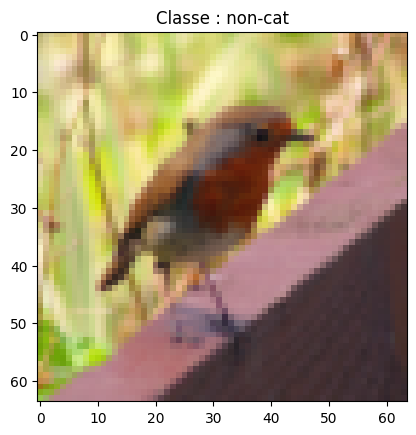

In [6]:

index = 10
plt.imshow(train_x_orig[index])
plt.title(f"Classe : {classes[train_y[0, index]].decode('utf-8')}")
plt.show()


In [7]:

train_x = train_x_orig / 255.0
test_x = test_x_orig / 255.0

train_y = train_y.T  # (209, 1)
test_y = test_y.T    # (50, 1)
print(train_x.shape[0])

209


# Exercice 1 :  
L'objectif est de construire un réseau de neurones multicouche (MLP) à l’aide de Keras (API Sequential) pour résoudre un problème de classification binaire à partir d’images couleur de taille 64 × 64 × 3.  

Le modèle est constitué de plusieurs couches Dense (couches entièrement connectées), avec la fonction d'activation ReLU dans les couches cachées, et sigmoïde en sortie.
Pour assurer une bonne propagation du signal à travers le réseau, on utilise l’initialisation de He (HeNormal) adaptée aux fonctions ReLU.

L'entraînement est effectué avec l’optimiseur Adam, la fonction de perte binary_crossentropy, et un batch size de 128. Une validation est réalisée à chaque époque à l’aide d’un ensemble de test.
## Question 1 :
Créer les couches du modèle en suivant l’architecture ci-dessous :  
**Architecture du modèle :**

Flatten : mise à plat de l’image

Dense(20) + ReLU + HeNormal

Dense(7) + ReLU + HeNormal

Dense(5) + ReLU + HeNormal

Dense(1) + Sigmoid (sortie binaire)

In [12]:
# Modèle Sequential avec initialisation manuelle
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(64, 64, 3)),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(5,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')


])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Question 2  
Le modèle est compilé avec :

**Optimiseur :** adam, adaptatif et efficace pour la plupart des tâches.

**Fonction de perte :** binary_crossentropy, adaptée à la classification binaire.

**Métrique :** accuracy, pour évaluer la proportion de prédictions correctes.



In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

# Question 3 :  
Entrainer le modèle avec un nombre d'epochs =100 et batch size =32

In [ ]:

history = model.fit(train_x_orig, ...,
                    ...,
                     ...,
                    validation_data=(test_x, test_y),
                    verbose=1)

Epoch 1/100


7/7 [==============================] - 2s 63ms/step - loss: 0.8306 - accuracy: 0.5550 - val_loss: 0.8010 - val_accuracy: 0.3400
Epoch 2/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6519 - accuracy: 0.6555 - val_loss: 0.8602 - val_accuracy: 0.3400
Epoch 3/100
7/7 [==============================] - 0s 15ms/step - loss: 0.6532 - accuracy: 0.6555 - val_loss: 0.9020 - val_accuracy: 0.3400
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6523 - accuracy: 0.6555 - val_loss: 0.8958 - val_accuracy: 0.3400
Epoch 5/100
7/7 [==============================] - 0s 28ms/step - loss: 0.6517 - accuracy: 0.6555 - val_loss: 0.8756 - val_accuracy: 0.3400
Epoch 6/100
7/7 [==============================] - 0s 20ms/step - loss: 0.6496 - accuracy: 0.6555 - val_loss: 0.8703 - val_accuracy: 0.3400
Epoch 7/100
7/7 [==============================] - 0s 18ms/step - loss: 0.6496 - accuracy: 0.6555 - val_loss: 0.8741 - val_accuracy: 0.3400
Epoch 8/100
7/7 [=

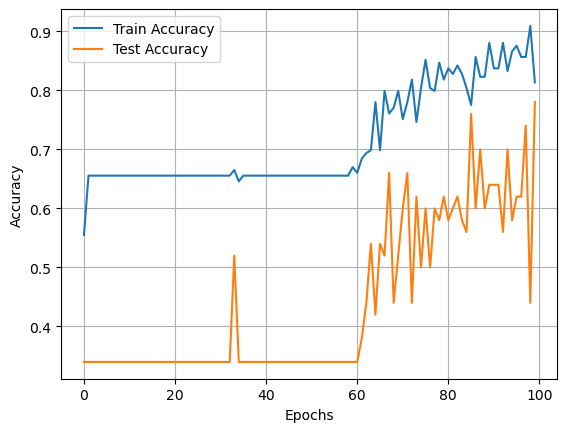

In [ ]:

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# Question 4 :  
Evaluer le modèle sur le test set

In [ ]:

test_loss, test_acc = ...
print(f"Test Accuracy: {test_acc * 100:.2f}%")


2/2 [==============================] - 0s 10ms/step - loss: 0.7025 - accuracy: 0.7800
Test Accuracy: 78.00%
